Load the word embedding vectors from both trained models (Unigram and Bigram). Both models and their corresponding vectors were saved locally under a *.pkl* file such that another training from scratch is avoided.

In [1]:
import pickle

#### Load word2vec saved data using pickle
with open("variables.pkl", "rb") as f:
    model, model_b, x_vals, y_vals, x_vals_b, y_vals_b = pickle.load(f)

#### gensim's word2vec model.wv() outputs the word vectors
output_vectors = model.wv
output_vectors_b = model_b.wv

**TSNE** dimenstionality reduction to **2D**

In [2]:
from dim_reduction_techniques import reduce_dimensions_tsne
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Unigram
x_vals, y_vals, labels = reduce_dimensions_tsne(model)

#### Bigram & Trigram
x_vals_b, y_vals_b, labels_b = reduce_dimensions_tsne(model_b)

print('TSNE Performed')

TSNE Performed


##### Tag Cluster Plot

To better visualize how this tag discovery process based on word embedding similarity was achieved, a set of selected clusters is visualized below. A visualization from which we can aknowledge that tags that seem to have a similar semantic meaning in terms of our languages, are also close mathematically. 

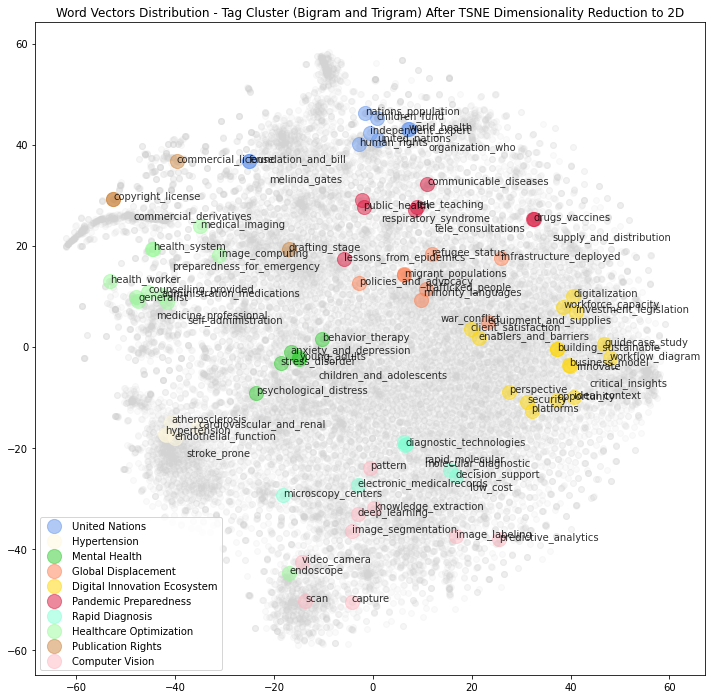

In [3]:
from matplotlib import pyplot as plt
from dim_reduction_techniques import check_overlap

def get_vector_values(values, word_indexes):
    return [values[word_index] for word_index in word_indexes]

def scatter_word_group(x_values, y_values, word_indexes, color_name, label_name):
    return plt.scatter(get_vector_values(x_values, word_indexes), 
            get_vector_values(y_values, word_indexes), 
            color = color_name, alpha = 0.5, s = 200, label = label_name)

bigrams = [['world_health', 'children_fund', 'independent_expert', 'organization_who', 'united_nations',
           'human_rights', 'foundation_and_bill', 'melinda_gates', 'nations_population'], 
           ['atherosclerosis', 'hypertension', 'stroke_prone', 'cardiovascular_and_renal', 'endothelial_function'],
           ['behavior_therapy', 'anxiety_and_depression', 'stress_disorder', 'young_adults', 'psychological_distress', 'children_and_adolescents'],
           ['refugee_status', 'migrant_populations', 'policies_and_advocacy', 'trafficked_people', 'minority_languages','war_conflict', 'infrastructure_deployed', 
            'equipment_and_supplies'],
           ['opportunity', 'platforms', 'security', 'perspective', 'business_model', 'ideal_context', 'building_sustainable', 'critical_insights', 'workflow_diagram', 
            'innovate', 'guidecase_study', 'enablers_and_barriers', 'digitalization', 'workforce_capacity', 'investment_legislation', 'client_satisfaction',],
           ['communicable_diseases', 'public_health', 'tele_teaching', 'respiratory_syndrome', 'tele_consultations', 'drugs_vaccines', 'supply_and_distribution', 
            'lessons_from_epidemics'],
           ['microscopy_centers', 'diagnostic_technologies', 'rapid_molecular', 'molecular_diagnostic', 'decision_support', 'low_cost', 'electronic_medicalrecords'],
           ['health_worker', 'health_system', 'image_computing', 'medical_imaging', 'endoscope', 'generalist', 'administration_medications',
            'self_administration', 'counselling_provided', 'medicine_professional', 'preparedness_for_emergency'], 
           ['copyright_license', 'commercial_derivatives', 'commercial_license', 'drafting_stage'], 
           ['knowledge_extraction', 'deep_learning', 'pattern', 'image_segmentation', 'image_labeling', 'predictive_analytics', 'capture', 'scan', 'video_camera']]
bigram_labels = ['United Nations', 'Hypertension', 'Mental Health', 'Global Displacement', 'Digital Innovation Ecosystem', 'Pandemic Preparedness', 'Rapid Diagnosis', 
                 'Healthcare Optimization', 'Publication Rights', 'Computer Vision']
bigram_colors = ['cornflowerblue', 'cornsilk', 'limegreen', 'coral', 'gold', 'crimson', 'aquamarine', 'palegreen', 'peru', 'lightpink']


annotated_points = []

plt.figure(figsize=(12, 12))
plt.title('Word Vectors Distribution - Tag Cluster (Bigram and Trigram) After TSNE Dimensionality Reduction to 2D')
plt.scatter(x_vals_b, y_vals_b, color = 'lightgray', alpha = 0.1)


for i, bigram in enumerate(bigrams):
    chosen_indices = [output_vectors_b.get_index(word) for word in bigram]
    for j, word_key_index in enumerate(chosen_indices):
        current_pos = (x_vals_b[word_key_index], y_vals_b[word_key_index])
            
        # print('Debug | Word: {}, Coords: {}, {}'.format(words[i], x_vals[word_key_index], y_vals[word_key_index]))
        overlap = check_overlap(current_pos, annotated_points)
        if overlap:
            current_pos = (x_vals_b[word_key_index] + 4, y_vals_b[word_key_index] - 4)
        plt.annotate(bigram[j], xy = current_pos, alpha = 0.8)
        annotated_points.append(current_pos)
    scatter_word_group(x_vals_b, y_vals_b, chosen_indices, bigram_colors[i], bigram_labels[i])


plt.legend(loc = 'lower left')
plt.show()

In [45]:
from find_similar_tags import similarities_for_tags

zjarr_e_ftohte = similarities_for_tags(['hierarchical', 'processing', 'computer', 'radiographics', 'neuroimage', 'imaging', 'endoscope', 'lensless', 'multispectral'], output_vectors)

For Tag: hierarchical
Similarities:
('sanfeliu', 0.625326931476593)
('alcezar', 0.6199963688850403)
('vanrell', 0.6174043416976929)
('inproc', 0.6171450614929199)
('niblack', 0.6153993606567383)
('eklundh', 0.6149693131446838)
('andvideo', 0.6121628880500793)
('russo', 0.609096884727478)
('rajkomar', 0.6043408513069153)
('aloimonos', 0.6031891107559204)
('broderick', 0.595771074295044)
('aisen', 0.5951552391052246)
('glocker', 0.5940613150596619)
('gans', 0.5930624008178711)
('icml', 0.5905447006225586)
('nashville', 0.587698221206665)
('recognit', 0.5860169529914856)
('bor', 0.5850473642349243)
('rogers', 0.5831061601638794)
('tensorflow', 0.5830787420272827)
('lundervold', 0.5778749585151672)
('icpr', 0.5740860104560852)
('haux', 0.5727657079696655)
('wasserstein', 0.5703777074813843)
('maribor', 0.5699376463890076)
('basedretrieval', 0.568254292011261)
('rajpurkar', 0.5635727643966675)
('deng', 0.5620852708816528)
('neuralnetwork', 0.5618884563446045)
('empir', 0.5610876679420471)
(